In [2]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


In [3]:
sonardata=pd.read_csv('sonar.csv',header=None)

In [4]:
sonardata

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
sonardata.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
sonardata.iloc[1:4,1:5]

,1,2,3,4
1,0.0523,0.0843,0.0689,0.1183
2,0.0582,0.1099,0.1083,0.0974
3,0.0171,0.0623,0.0205,0.0205


In [7]:
sonardata.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6B0AF5308>,
      dtype=object)

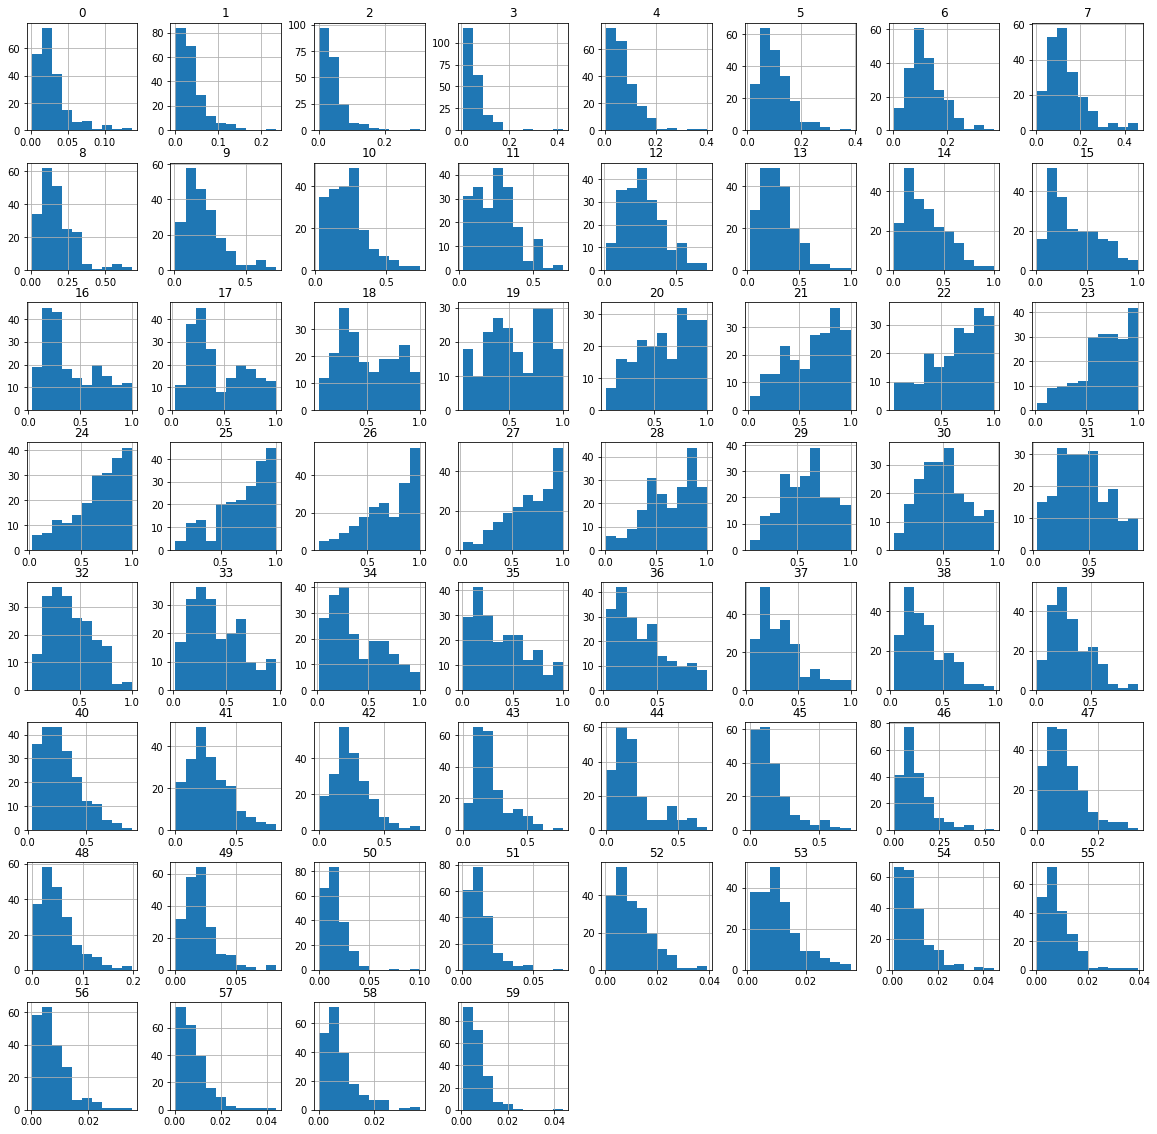

In [8]:
sonardata.hist(figsize=(20,20))

In [9]:
sdtarget=sonardata.iloc[:,-1]
sdtarget

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [10]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(sdtarget)
trta=pd.DataFrame(le.transform(sdtarget))
trta


,0
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [11]:
trta.isnull().sum()

0    0
dtype: int64

In [12]:
sdx=sonardata.iloc[:,0:60]

In [13]:
sdx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [14]:
sdx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [15]:
trta
target=trta.rename(columns={0:60})
print(target)

     60
0     1
1     1
2     1
3     1
4     1
..   ..
203   0
204   0
205   0
206   0
207   0

[208 rows x 1 columns]


In [16]:
print(sdx.shape)
print(target.shape)

(208, 60)
(208, 1)


In [17]:
sonar_new=pd.concat([sdx,target],axis=1)

In [18]:
sonar_new.shape


(208, 61)

In [19]:
import seaborn as sb

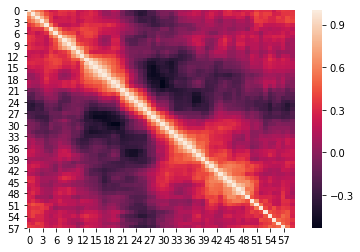

In [20]:
sb.heatmap(sdx.corr())

In [21]:
sdx.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64

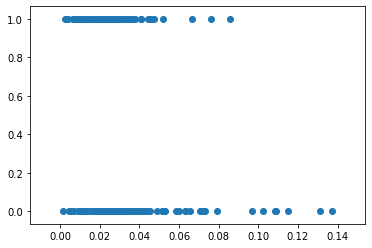

In [22]:
plt.scatter(sonar_new[0],sonar_new[60])
plt.show()

In [23]:
sonar_new.corr


<bound method DataFrame.corr of          0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...   

In [24]:
sdx.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
dtype: int64

In [25]:
sonardata.groupby(60).size()

60
M    111
R     97
dtype: int64

In [26]:
sonar_new.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [27]:
trta.shape

(208, 1)

In [28]:
type(sdx)

pandas.core.frame.DataFrame

In [29]:
type(target)

pandas.core.frame.DataFrame

In [30]:
sdx.shape

(208, 60)

In [31]:
target.shape

(208, 1)

In [32]:
from scipy.stats import zscore

In [33]:
zsc=zscore(sonar_new)
#print(np.where(zsc>3))
threshold=3
sdx_new=sonar_new[(zsc<3).all(axis=1)]
sdx_new


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [34]:
sonar_new.shape

(208, 61)

In [35]:
sdx_new.shape

(168, 61)

In [36]:
sdx_new.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
        ...   
56    1.378156
57    1.364882
58    1.464334
59    1.144572
60    0.000000
Length: 61, dtype: float64

In [37]:
sdx_new.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1


In [38]:
import numpy as np
for col in sdx_new.columns:
    if sdx_new.skew().loc[col]>0.55:
        sdx_new[col]=np.log1p(sdx_new[col])
    

C:\Users\booda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
sdx_new.skew()

0     1.211293
1     1.228298
2     1.537569
3     1.133208
4     0.821050
        ...   
56    1.362574
57    1.349570
58    1.447639
59    1.134093
60    0.000000
Length: 61, dtype: float64

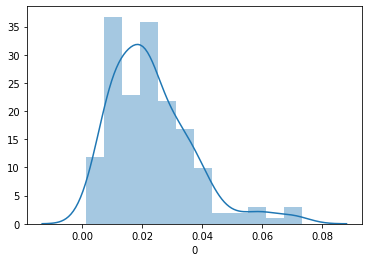

In [40]:
import seaborn as sb
sb.distplot(sdx_new[0])
plt.show()

In [41]:
x=sdx_new.iloc[:,0:60]
y=sdx_new.iloc[:,-1]

In [42]:
x.shape

(168, 60)

In [43]:
y.shape

(168,)

In [44]:
type(y)

pandas.core.series.Series

In [45]:
ytarget=pd.DataFrame(data=y)
ytarget.shape

(168, 1)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [47]:

sv=SVC(kernel='rbf')
final_acc=0
for rand_st in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,ytarget,test_size=.22,random_state=rand_st)
    
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('for randst',rand_st,'accuracy score is ',acc)
    if acc>final_acc:
        final_acc=acc
        final_rs=rand_st
print('best acc is',final_acc,'for the random state',final_rs)

for randst 42 accuracy score is  0.43243243243243246
for randst 43 accuracy score is  0.43243243243243246
for randst 44 accuracy score is  0.6486486486486487
for randst 45 accuracy score is  0.5675675675675675
for randst 46 accuracy score is  0.7027027027027027
for randst 47 accuracy score is  0.7027027027027027
for randst 48 accuracy score is  0.5675675675675675
for randst 49 accuracy score is  0.3783783783783784
for randst 50 accuracy score is  0.5405405405405406
for randst 51 accuracy score is  0.43243243243243246
for randst 52 accuracy score is  0.5945945945945946
for randst 53 accuracy score is  0.7297297297297297
for randst 54 accuracy score is  0.4594594594594595
for randst 55 accuracy score is  0.40540540540540543
for randst 56 accuracy score is  0.3783783783783784
for randst 57 accuracy score is  0.6486486486486487
for randst 58 accuracy score is  0.5405405405405406
for randst 59 accuracy score is  0.35135135135135137
for randst 60 accuracy score is  0.5945945945945946
for ran

In [48]:
sv=SVC(kernel='rbf')
x_train,x_test,y_train,y_test=train_test_split(x,ytarget,test_size=.22,random_state=58)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred) 
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('accuracy score:',acc)


[[14  3]
 [14  6]]
              precision    recall  f1-score   support

           0       0.50      0.82      0.62        17
           1       0.67      0.30      0.41        20

    accuracy                           0.54        37
   macro avg       0.58      0.56      0.52        37
weighted avg       0.59      0.54      0.51        37

accuracy score: 0.5405405405405406


In [49]:
#checking with cross validation if the model is performing or not

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
cvs=cross_val_score(sv,x,ytarget,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.61764706 0.73529412 0.47058824 0.67647059 0.375     ]
0.575
0.1331999044026383


In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7837837837837838
[[14  3]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.83      0.75      0.79        20

    accuracy                           0.78        37
   macro avg       0.79      0.79      0.78        37
weighted avg       0.79      0.78      0.78        37



In [51]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)
predci=kn.predict(x_test)
print(accuracy_score(y_test,predci))

0.5945945945945946


In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
adb=AdaBoostClassifier(n_estimators=10,)
adb.fit(x_train,y_train)
adp=adb.predict(x_test)
print(adb.predict_proba(x_test))
print(adp)
print(accuracy_score(y_test,adp))

[[0.55821996 0.44178004]
 [0.50893904 0.49106096]
 [0.73768243 0.26231757]
 [0.63558176 0.36441824]
 [0.56376246 0.43623754]
 [0.645352   0.354648  ]
 [0.65344064 0.34655936]
 [0.44338239 0.55661761]
 [0.54889322 0.45110678]
 [0.46015698 0.53984302]
 [0.60013377 0.39986623]
 [0.37963286 0.62036714]
 [0.50893904 0.49106096]
 [0.37022875 0.62977125]
 [0.50484065 0.49515935]
 [0.49175285 0.50824715]
 [0.51523913 0.48476087]
 [0.35742375 0.64257625]
 [0.6928062  0.3071938 ]
 [0.28700517 0.71299483]
 [0.37907071 0.62092929]
 [0.49771316 0.50228684]
 [0.56108895 0.43891105]
 [0.50714794 0.49285206]
 [0.36492218 0.63507782]
 [0.56912623 0.43087377]
 [0.38139818 0.61860182]
 [0.38139818 0.61860182]
 [0.49641681 0.50358319]
 [0.39672465 0.60327535]
 [0.55704699 0.44295301]
 [0.55821996 0.44178004]
 [0.61989359 0.38010641]
 [0.50119353 0.49880647]
 [0.5666234  0.4333766 ]
 [0.50647049 0.49352951]
 [0.42539299 0.57460701]]
[0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1

In [54]:
#Fitting the final model

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))



0.8378378378378378
[[14  3]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.85      0.85      0.85        20

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.84        37
weighted avg       0.84      0.84      0.84        37



In [55]:
preddtc

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [56]:
y_test

,60
56,1
34,1
121,0
86,1
164,0
119,0
187,0
16,1
190,0
93,1
